In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

root = '/opt/home/revoli/data_worker/paper/benchmark/docking/pose_stats'
methods = ['DiffDock', 'DeepDock', 'Interformer-PoseScore', 'Interformer-Energy']
all_df = []
for method in methods:
    a = pd.read_csv(f'/{root}/{method}_pose2stats.csv')  # tmp test, interformer_pose2stats
    a['method'] = method
    all_df.append(a)
df = pd.concat(all_df).reset_index(drop=True)
#
# df['method'] = df['method'].map(lambda x: x.capitalize())
df['inter_type'] = df['inter_type'].map(lambda x: x.capitalize())
df['inter_type'] = df['inter_type'].map(lambda x: x if x == 'Hbond' else 'Hydrophobic')
df['Interactions'] = df['method'] + '-' + df['inter_type']
# scale hit rate 100 times
df['hit_rate'] *= 100.

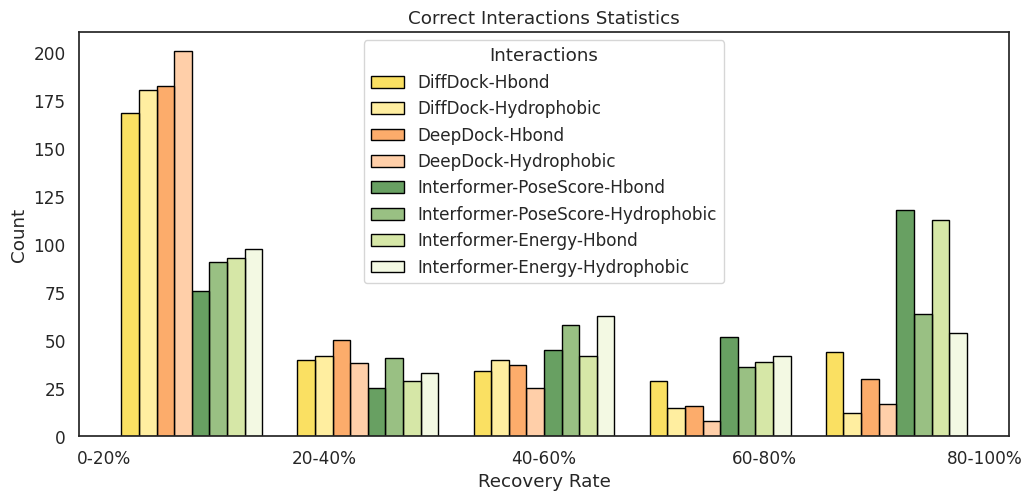

In [12]:
sns.set(font_scale=1.1)
sns.set_style("white")
fig = plt.figure(figsize=(12, 5.25))
colors = ['#f9d62e', '#ffe981', '#fc913a', '#ffc08c', '#36802d', '#77ab59', '#c9df8a', '#f0f7da']
#
sns.histplot(data=df, x='hit_rate', hue='Interactions', edgecolor='black', bins=5, palette=colors, shrink=.8,
             multiple="dodge").set_title('Correct Interactions Statistics')
plt.xlabel('Recovery Rate')
plt.xticks(np.linspace(0, 100, 5), ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

fig.savefig('figures/3c.svg')
plt.show()